# Demonstrate PCA rotation transformation 

JMA   14 Aug 2024

In [96]:
import numpy as np
import pandas as pd
import numpy.linalg as la

import scipy as sp 

# stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns


In [264]:
# create a random matrix in the positive quadrant. 
ROWS = 30
COLS = 2
elements = np.random.uniform(0, 1, ROWS * COLS)
X_rand = np.array(elements).reshape([ROWS, COLS])
# Make this wider than tall.
X_rand[:,0] = 4 * X_rand[:,0]
#COV = X.T @ X
np.apply_along_axis(np.mean, 0, X_rand) # , COV

array([1.79795924, 0.39911418])

In [265]:
# create unit length columns
def col_sums(X):
    col_sums = np.apply_along_axis(sum, 0, X)[:, np.newaxis]  # change shape to [ROWS, 1]
    # Duplicate the columns
    col_sums = np.repeat(col_sums, ROWS, axis=0).reshape([ROWS, COLS], order = 'F')
    return col_sums

sums = col_sums(X_rand)
X = X_rand/sums

In [266]:
x_colmeans = np.mean(X_rand, axis=0)[np.newaxis, :].repeat(ROWS).reshape([ROWS, COLS], order= 'F')
x_colmeans

array([[1.79795924, 0.39911418],
       [1.79795924, 0.39911418],
       [1.79795924, 0.39911418],
       [1.79795924, 0.39911418],
       [1.79795924, 0.39911418],
       [1.79795924, 0.39911418],
       [1.79795924, 0.39911418],
       [1.79795924, 0.39911418],
       [1.79795924, 0.39911418],
       [1.79795924, 0.39911418],
       [1.79795924, 0.39911418],
       [1.79795924, 0.39911418],
       [1.79795924, 0.39911418],
       [1.79795924, 0.39911418],
       [1.79795924, 0.39911418],
       [1.79795924, 0.39911418],
       [1.79795924, 0.39911418],
       [1.79795924, 0.39911418],
       [1.79795924, 0.39911418],
       [1.79795924, 0.39911418],
       [1.79795924, 0.39911418],
       [1.79795924, 0.39911418],
       [1.79795924, 0.39911418],
       [1.79795924, 0.39911418],
       [1.79795924, 0.39911418],
       [1.79795924, 0.39911418],
       [1.79795924, 0.39911418],
       [1.79795924, 0.39911418],
       [1.79795924, 0.39911418],
       [1.79795924, 0.39911418]])

In [267]:
X_centered = X_rand- x_colmeans
np.apply_along_axis(np.mean, 0, X_centered)

array([1.92438658e-16, 7.40148683e-18])

In [268]:
XTcov = X_centered.T @ X_centered /2
XTcov , np.cov(X_rand.T, bias=False) , la.det(XTcov) 

(array([[21.3627844 ,  1.07439995],
        [ 1.07439995,  1.11339698]]),
 array([[1.47329548, 0.07409655],
        [0.07409655, 0.076786  ]]),
 np.float64(22.63092428593613))

In [269]:
# The columns (features) are centered but not the rows, so the transposed X cov differs 
# (but is still singular)
Xcov = np.cov(X_rand)
la.det(Xcov), Xcov, X_centered @ X_centered.T /2

(np.float64(-0.0),
 array([[ 9.31445343e-02,  3.31219014e-01,  3.97376957e-01,
          4.47073064e-01,  7.55232738e-01,  3.21912381e-01,
          2.41877289e-01,  2.86507633e-01,  1.43341697e-01,
          5.33183291e-02,  4.23946466e-01,  3.33653915e-01,
          6.63816079e-01,  7.76420765e-01,  4.51360497e-01,
          1.67197232e-01,  6.21032899e-01,  3.91333022e-02,
         -5.50038310e-02,  6.38036359e-01, -5.16968821e-03,
          5.93741706e-01,  5.29204850e-03,  9.68950215e-03,
          5.94234852e-02,  4.99998280e-01,  1.42629514e-02,
          5.51890017e-01,  1.13674077e-04,  1.96539077e-01],
        [ 3.31219014e-01,  1.17780432e+00,  1.41305987e+00,
          1.58977765e+00,  2.68558369e+00,  1.14471023e+00,
          8.60107979e-01,  1.01881207e+00,  5.09718534e-01,
          1.89598289e-01,  1.50754020e+00,  1.18646275e+00,
          2.36050895e+00,  2.76092765e+00,  1.60502363e+00,
          5.94548062e-01,  2.20837332e+00,  1.39156783e-01,
         -1.95591881

# Run PCA for comparison

In [270]:
# Only 2 components are possible, since the covariance will be X.T @ X - 2 x 2
pca_model = PCA(n_components=2)
# Note that you pass the X - design matrix as an argument, not the covariance 
pca_model.fit(X_rand)
pca_model.explained_variance_,  pca_model.components_ 

(array([1.47721591, 0.07286556]),
 array([[ 0.99860321,  0.05283595],
        [-0.05283595,  0.99860321]]))

In [272]:
# The explained variance and "components" (rotation matrix) are just 
# the covariance eigen values and vectors
# This returns the same thing as the PCA fit function, save for the signs of the eigenvectors. 
val, vec = la.eig(np.cov(X_rand.T))
val, vec

(array([1.47721591, 0.07286556]),
 array([[ 0.99860321, -0.05283595],
        [ 0.05283595,  0.99860321]]))

In [251]:
# Apply the transform to obtain the data points in the rotated space. 
# TODO Why are these not scaled, as the "rotated_X" are
X_pca_components = pca_model.transform(X_rand)
X_rand, X_pca_components

(array([[0.02256824, 0.77407465],
        [0.11424423, 0.94076875],
        [0.99981475, 0.84364375],
        [0.81355016, 0.51526554],
        [0.46588581, 0.89368828],
        [0.85519419, 0.38832434],
        [0.0690767 , 0.10452554],
        [0.68927591, 0.91759338],
        [0.14660118, 0.25683451],
        [0.58467566, 0.23249708],
        [0.7188022 , 0.93035008],
        [0.07055473, 0.06643217],
        [0.8676191 , 0.38822177],
        [0.4619567 , 0.89328632],
        [0.61061235, 0.23134553],
        [0.62792262, 0.68469329],
        [0.75297566, 0.70094533],
        [0.60298964, 0.80990141],
        [0.41951535, 0.89342815],
        [0.8704278 , 0.67768296],
        [0.37257817, 0.83960749],
        [0.16846359, 0.82085179],
        [0.56576779, 0.09431961],
        [0.15021559, 0.95636033],
        [0.07676926, 0.0182083 ],
        [0.50704088, 0.74928679],
        [0.34478728, 0.61877516],
        [0.10201039, 0.90548682],
        [0.37640336, 0.95807179],
        [0.715

In [279]:
# The same thing using the e-values & vectors TODO - check this! 
# The data points in the rotated space. 

rotated_X = X_centered @  vec #  * np.sqrt(val)) 

In [286]:
# Add zeros at the origin for the features in component space.  
zero_stacked = np.stack( [ np.zeros([2,2]), pca_model.components_ * np.sqrt(pca_model.explained_variance_) ], axis=2)
zero_stacked[0,0,:], zero_stacked[1,0,:]

(array([0.        , 1.21371004]), array([ 0.        , -0.06421723]))

Text(0.5, 1.0, 'BiPlot: Principal components and data points in feature space.')

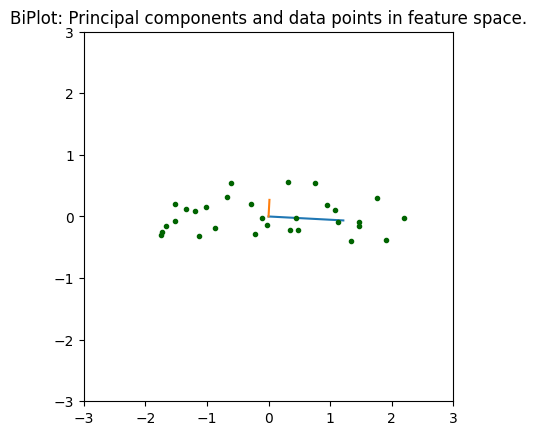

In [294]:
# There are only 2 pca components, since they are transforms of the 2 features.
# But each component has 3 dimensions, of which only two can be shown here. 
# Note their orthogonality.
# f = plt.figure()

fig1, ax = plt.subplots()
plt.xlim(-3, 3)
plt.ylim(-3, 3)
ax.set_box_aspect(1)
# f = fig.add_subplot()
# f.set_aspect('equal')
# Plot the components: The columns in the rotation matrix
plt.plot(zero_stacked[0,0,:], zero_stacked[1,0,:])
plt.plot(zero_stacked[0,1,:], zero_stacked[1,1,:])
# PLot the data points in rotated components space. # TODO - check if these have been rotated. 
for k in range(ROWS):
    plt.plot(rotated_X[k,0], rotated_X[k,1], '.', color = 'darkgreen')

plt.title("BiPlot: Principal components and data points in feature space.")

In [295]:
# To obtain the loadings matrix - the PCA basis, scaled by variance
# Multiply each component by the square root of its corresponding eigenvalue:
# https://stackoverflow.com/questions/21217710/factor-loadings-using-sklearn

pca_model.components_ * np.sqrt(pca_model.explained_variance_)

array([[ 1.21371004,  0.01426234],
       [-0.06421723,  0.26955917]])

In [107]:
# Reconstruct the PCA component vectors. ??
np.cov(X.T), np.cov(X.T) @ pca_model.components_ 

(array([[ 0.2230302 , -0.05137592],
        [-0.05137592,  0.02936059]]),
 array([[ 0.20402312, -0.10371365],
        [-0.04276532,  0.04089811]]))

In [296]:
# With SVD we just recover the same eigen-values and vectors
# The u and vh matrices are just the eigenvectors of the cov matrix. 
uc,sc,vhc = la.svd(np.cov(X.T))
loadings = vhc * sc
uc,sc,vhc

(array([[-0.66094964, -0.75043026],
        [-0.75043026,  0.66094964]]),
 array([0.00063666, 0.00040534]),
 array([[-0.66094964, -0.75043026],
        [-0.75043026,  0.66094964]]))

In [297]:
u,s,vh = la.svd(X)
u,s,vh

(array([[-1.87733884e-01,  2.32184447e-01, -1.75316806e-01,
         -1.31595353e-01, -2.58734464e-01, -8.23502977e-02,
         -3.03104344e-01, -1.45300936e-01, -3.15121690e-02,
         -2.54481429e-01, -1.23002686e-01, -3.21395235e-01,
         -1.30513987e-01, -1.61325158e-01, -2.47694027e-01,
         -7.44795209e-02, -2.08707245e-01, -1.22366293e-01,
         -1.33299979e-01, -1.91103086e-01, -4.32350277e-02,
         -3.12149443e-01, -1.69962313e-02, -6.75032545e-02,
         -1.46169493e-01, -2.33983256e-01, -2.48254101e-03,
         -1.92311064e-01, -1.22153474e-01, -1.92216744e-01],
        [-1.31525052e-01, -8.00825815e-02, -6.01317919e-02,
         -1.69501156e-01, -2.29810803e-01, -1.41293127e-01,
          2.68095910e-01, -1.40349896e-02, -7.09160786e-02,
          3.50258118e-01, -1.63503030e-01,  2.19765946e-01,
         -3.52334950e-01, -3.98648295e-01,  7.03980924e-03,
         -2.41919180e-02, -1.95261263e-01,  1.57140490e-01,
          2.52784656e-01, -2.36785385e-


Both matrici are orthonormal:  

orthogonal rows and columns, and unit length rows and columns. 

In [298]:
np.apply_along_axis(la.norm, 1, u.T), np.apply_along_axis(la.norm, 1, u)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [299]:
np.round(u @ u.T, 3),  np.round(u.T @ u,3)

(array([[ 1., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,  0., -0.,
         -0., -0., -0., -0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.,
         -0., -0.,  0., -0.],
        [-0.,  1., -0.,  0.,  0.,  0., -0., -0.,  0., -0.,  0., -0.,  0.,
          0., -0., -0.,  0., -0., -0.,  0., -0., -0., -0., -0., -0., -0.,
          0., -0., -0., -0.],
        [-0., -0.,  1., -0., -0., -0.,  0., -0., -0., -0., -0.,  0., -0.,
         -0., -0., -0., -0.,  0.,  0., -0., -0., -0.,  0.,  0., -0., -0.,
         -0., -0.,  0., -0.],
        [-0.,  0., -0.,  1., -0., -0., -0.,  0.,  0., -0.,  0., -0.,  0.,
         -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
          0., -0., -0., -0.],
        [-0.,  0., -0., -0.,  1., -0.,  0., -0.,  0., -0.,  0.,  0., -0.,
          0., -0., -0., -0., -0., -0., -0.,  0., -0., -0.,  0., -0., -0.,
         -0., -0., -0., -0.],
        [-0.,  0., -0., -0., -0.,  1., -0., -0., -0., -0., -0., -0., -0.,
          0., -0.,  0., -0., -0., -0

In [300]:
np.dot(u[:,0], u[:,1]) , np.dot(u[0,:], u[1,:]) 

(np.float64(-2.0469737016526324e-16), np.float64(-2.0816681711721685e-16))

## low rank components of the transform

In [301]:
# Reconstruction, partial singular values
def one_singular_value(value, x):
    r_cnt, c_cnt = x.shape
    u, s, vh = la.svd(x)
    s_reconstruction = np.zeros([r_cnt, c_cnt])
    s_reconstruction[value, value] = s[value]
    return u @ s_reconstruction @ vh

# sub_concept_transforms = one_singular_value(1, X)
X, one_singular_value(1, X) + one_singular_value(0, X) 

(array([[2.05804747e-02, 5.66649430e-02],
        [3.31554608e-02, 2.11773816e-02],
        [4.16187296e-02, 3.36998114e-02],
        [4.23346685e-02, 1.76923258e-02],
        [7.40064865e-02, 4.11101896e-02],
        [2.96346367e-02, 8.91823546e-03],
        [3.87619413e-02, 8.10096713e-02],
        [3.12992297e-02, 3.01188739e-02],
        [1.28431324e-02, 2.38257556e-03],
        [2.13771334e-02, 7.56667778e-02],
        [4.00226582e-02, 1.62271459e-02],
        [4.68560329e-02, 8.19544157e-02],
        [5.84222550e-02, 6.28399631e-03],
        [6.89255356e-02, 1.00212465e-02],
        [5.05931857e-02, 5.32366454e-02],
        [1.75600359e-02, 1.43993939e-02],
        [6.05789621e-02, 3.25570455e-02],
        [1.12853930e-02, 3.56944481e-02],
        [5.01366478e-03, 4.38727525e-02],
        [6.06430601e-02, 2.62653552e-02],
        [2.57092970e-03, 1.35824167e-02],
        [6.56173569e-02, 6.58162417e-02],
        [1.55680540e-03, 4.96515729e-03],
        [5.33837167e-03, 2.0298796

In [114]:
W = X @ [1,0]
W

array([0.64351055, 0.04391444, 0.97573621])